# Medical Expenses Prediction Analysis

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from collections import Counter
import pylab
from scipy.stats import norm, skew, boxcox
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('med-insurance.csv')
df.shape

(1338, 7)

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


## Variable Description
**age** : age of primary beneficiary

**sex** : insurance contractor gender, female, male

**bmi** : Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

**children** : Number of children covered by health insurance / Number of dependents

**smoker** : Smoking

**region** : the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

**charges** : Individual medical costs billed by health insurance

# EDA
**Target** is expenses

In [9]:
df[['sex', 'expenses']].groupby(['sex'], as_index=False).mean().sort_values(by = 'expenses', ascending = False).style.background_gradient("Greens")

,sex,expenses
1,male,13956.751420
0,female,12569.578897


In [10]:
df[['children', 'expenses']].groupby(['children'], as_index=False).mean().sort_values(by = 'expenses', ascending = False).style.background_gradient("Greens")

,children,expenses
3,3,15355.318535
2,2,15073.564000
4,4,13850.656800
1,1,12731.171821
0,0,12365.975767
5,5,8786.035556


In [11]:
df[['smoker', 'expenses']].groupby(['smoker'], as_index= False).mean().sort_values(by = 'expenses', ascending = False).style.background_gradient('Greens')

,smoker,expenses
1,yes,32050.231971
0,no,8434.268449


In [12]:
df[['region', 'expenses']].groupby(['region'], as_index= False).mean().sort_values(by = 'expenses', ascending = False).style.background_gradient('Greens')

,region,expenses
2,southeast,14735.411538
0,northeast,13406.384691
1,northwest,12417.575169
3,southwest,12346.937908


In [27]:
cols= list(df.columns)

# Univariate Analysis

In [29]:
num_cols = ['age', 'bmi', 'expenses']
cat_cols = [col for col in cols if col not in num_cols]
cat_cols

['sex', 'children', 'smoker', 'region']

In [30]:
# plot for numerical cols
def plot_hist(variable):
    print('min {}:{}'.format(variable, min(df[variable])))
    print('max {}:{}'.format(variable, max(df[variable])))
    
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plt.hist(df[variable], color = 'orange')
    plt.xlabel(variable)
    plt.ylabel('Freq')
    plt.title("{} distribution with hist".format(variable))
    
    plt.subplot(1,3,2)
    sns.distplot(df[variable], fit = norm)
    plt.title("{} distribution with Distplot".format(variable))
    
    plt.subplot(1,3,3)
    stats.probplot(df[variable], dist = 'norm', plot = pylab)
    plt.title("{} distribution with Q-Q plot".format(variable))
    plt.show()

age
min age:18
max age:64


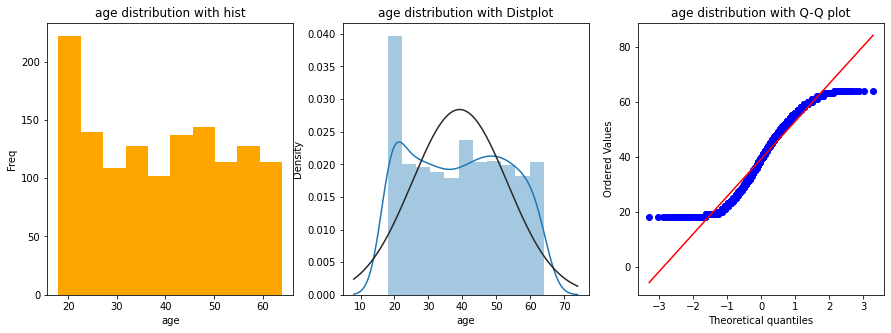

bmi
min bmi:16.0
max bmi:53.1


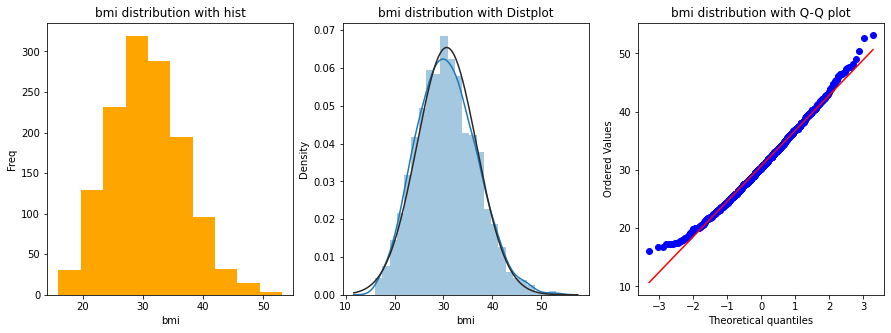

expenses
min expenses:1121.87
max expenses:63770.43


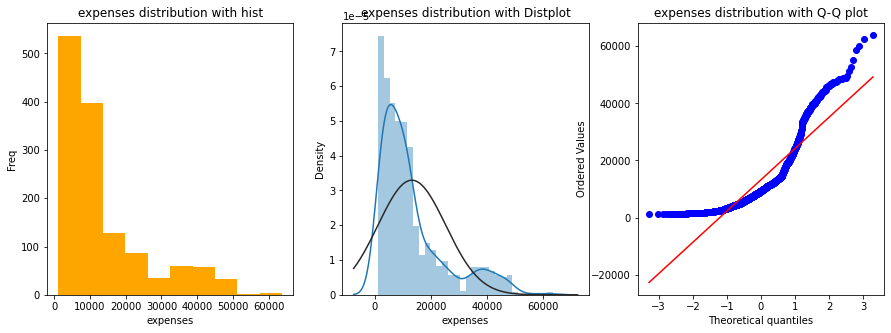

In [32]:
for col in num_cols:
    print(col)
    plot_hist(col)

In [33]:
# plot for categorical cols
def bar_plot(variable):
    var = df[variable]
    var_value = var.value_counts()
    
    plt.figure(figsize = (6,3))
    sns.countplot(x=variable, data = df, palette= "YlGnBu_r")
#     plt.bar(var_value.index, var_value, linewidth = 2)
#     plt.xticks(var_value.index, var_value.index.values)
#     plt.ylabel('Freq')
    plt.title(variable)
    plt.show()

    print("{}: \n{}".format(variable, var_value))

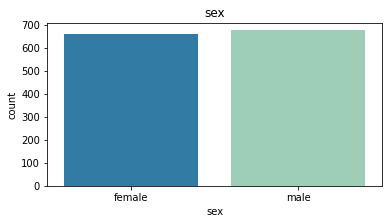

sex: 
male      676
female    662
Name: sex, dtype: int64


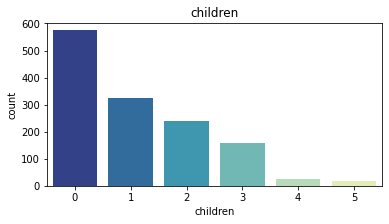

children: 
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


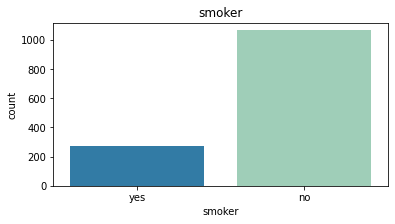

smoker: 
no     1064
yes     274
Name: smoker, dtype: int64


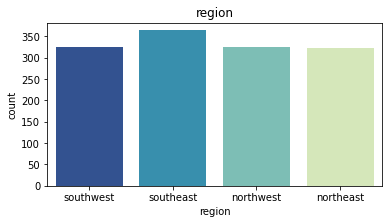

region: 
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [34]:
for col in cat_cols:
    bar_plot(col)

## Pie Plot

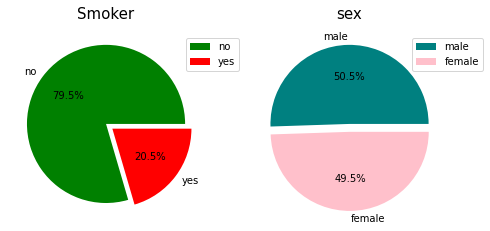

In [37]:
# smoker
plt.figure(figsize = (8,8))
plt.subplot(2,2,1)
labels = df['smoker'].value_counts().index
colors = ['green', 'red']
explode = [0, .1]
sizes = df['smoker'].value_counts().values
plt.pie(sizes, explode=explode, shadow=False, labels= labels, colors= colors, autopct = "%1.1f%%")
plt.title('Smoker', fontsize = 15)
plt.legend(labels, bbox_to_anchor = (0.8, -0.04, 0.4, 1))

# sex
plt.subplot(2,2,2)
labels = df['sex'].value_counts().index
colors = ['teal', 'pink']
sizes = df['sex'].value_counts().values
plt.pie(sizes, explode=explode, shadow=False, labels= labels, colors= colors, autopct = "%1.1f%%")
plt.title('sex', fontsize = 15)
plt.legend(labels, bbox_to_anchor = (0.8, -0.04, 0.4, 1));

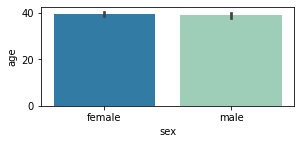

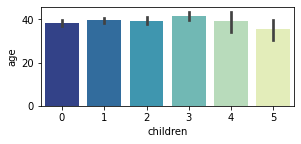

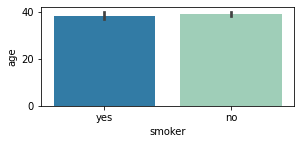

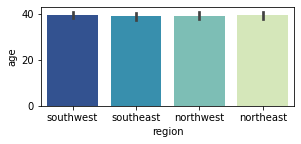

In [44]:
for i, col in enumerate(cat_cols):
    plt.figure(figsize = (10,4))
    plt.subplot(2,2,i+1)
    sns.barplot(x=col, y='age', data = df, palette = "YlGnBu_r")

<AxesSubplot:>

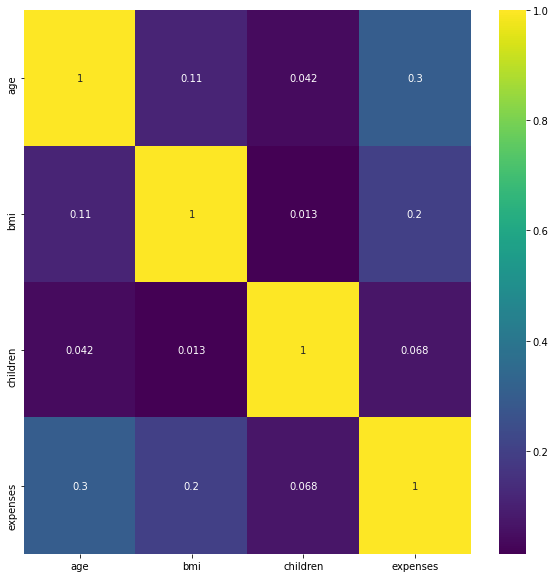

In [48]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True, cmap = 'viridis')

In [52]:
# missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

# Feature Engineering

although there are 4 categorical columns which need to encoding but children is orderal categorical column and hence the numbers itself make sense in this.

In [66]:
df1 = df.copy()
print(df1.shape)
df1 = pd.get_dummies(df, columns = ['sex', 'smoker', 'region'], drop_first=True)
df1.shape

(1338, 7)


(1338, 9)

In [67]:
df1.head()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,0,1,0,0,1
1,18,33.8,1,1725.55,1,0,0,1,0
2,28,33.0,3,4449.46,1,0,0,1,0
3,33,22.7,0,21984.47,1,0,1,0,0
4,32,28.9,0,3866.86,1,0,1,0,0


## Skewness in the Target variable

In [84]:
def plot_data(data, feature):
    plt.figure(figsize = (10,5))
    
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.title(feature)
    
    plt.subplot(1,2,2)
    stats.probplot(data[feature], dist = 'norm', plot= pylab)
    plt.title(feature)
    plt.show()

In [85]:
def transformation(trans, data, feature_list):
    before_trans=[]
    after_trans=[]
    for col in feature_list:
        before_trans.append(data[col].skew())
        if trans =='log':
            data[col+'_log'] = np.log(data[col])
            after_trans.append(data[col+'_log'].skew())
            plot_data(data, col +'_log' )
        elif trans == 'reciprocal':
            data[col+'_reciprocal'] = 1/(data[col])
            after_trans.append(data[col+'_reciprocal'].skew())
            plot_data(data, col +'_reciprocal' )
        elif trans == 'sqrt':
            data[col+'_sqrt'] = data[col]**0.5
            after_trans.append(data[col+'_sqrt'].skew())
            plot_data(data, col +'_sqrt' )
        elif trans == 'exp':
            data[col+'_exp'] = (data[col] **(1/1.2))
            after_trans.append(data[col+'_exp'].skew())
            plot_data(data, col +'_exp' )
        elif trans == 'boxcox':
            data[col+'_boxcox'], _ = stats.boxcox(data[col])
            after_trans.append(data[col+'_boxcox'].skew())
            plot_data(data, col +'_boxcox' )
            
    return data
        

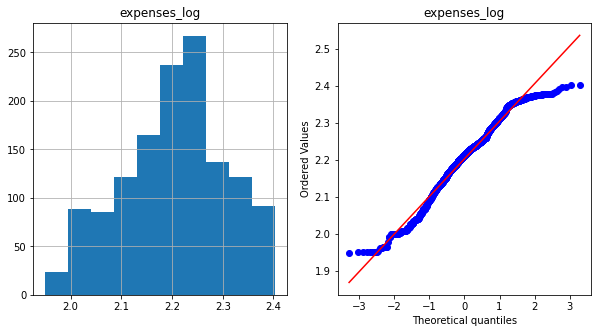

In [86]:
df1= transformation('log', df1, ['expenses'])

After trying so many transformations, I observed log transformation works best.

In [88]:
df1.drop('expenses', axis = 1, inplace = True)

In [89]:
df1.rename(columns={"expenses_log": "expenses"}, inplace = True)

In [90]:
df1.shape

(1338, 9)

# splitting the data

In [91]:
X = df1.drop(['expenses'], axis = 1)
y = df1.expenses

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [94]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (1003, 8)
x test:  (335, 8)
y train:  (1003,)
y test:  (335,)


# Model Building

In [95]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score

In [98]:
CV = []
R2_train = []
R2_test = []
mae_train=[]
mse_train=[]
mae_test=[]
mse_test=[]

def reg_model(model):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # Mean Squared error  of train set
    mse_train_model = mean_squared_error(y_train,y_pred_train)
    mse_train.append(round(mse_train_model,2))
    
    # Mean absolute error of train set
    mae_train_model = mean_absolute_error(y_train,y_pred_train)
    mae_train.append(round(mae_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # Mean Squared error of test set
    mse_test_model = mean_squared_error(y_test,y_pred_test)
    mse_test.append(round(mse_test_model,2))
    
    # Mean absolute error of train set
    mae_test_model = mean_absolute_error(y_test,y_pred_test)
    mae_test.append(round(mae_test_model,2))
    
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train Mean absolute error :",round(mae_train_model,2))
    print("Test Mean absolute error :",round(mae_test_model,2))
    print("Train Mean Squared error :",round(mse_train_model,2))
    print("Test Mean Squared error :",round(mse_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

## Linear Regression

Train R2-score : 0.75
Test R2-score : 0.77
Train Mean absolute error : 0.03
Test Mean absolute error : 0.03
Train Mean Squared error : 0.0
Test Mean Squared error : 0.0
Train CV scores : [0.75968443 0.7957369  0.70429027 0.70994992 0.7643381 ]
Train CV mean : 0.75


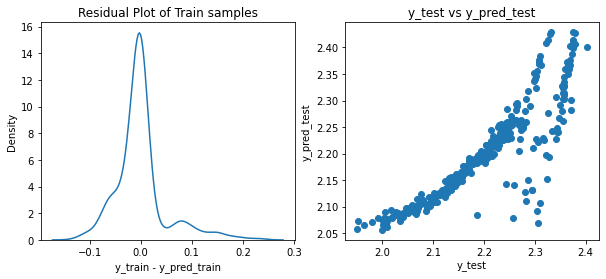

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
reg_model(lr)

## Ridge

Train R2-score : 0.75
Test R2-score : 0.77
Train Mean absolute error : 0.03
Test Mean absolute error : 0.03
Train Mean Squared error : 0.0
Test Mean Squared error : 0.0
Train CV scores : [0.75913955 0.79597598 0.70438202 0.7099567  0.76400313]
Train CV mean : 0.75


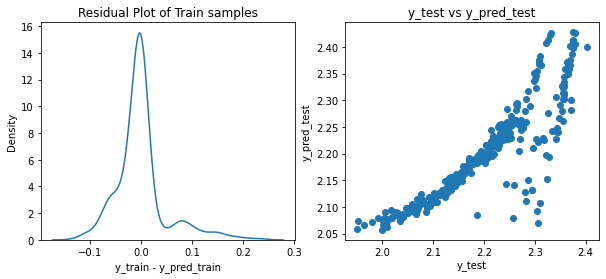

In [101]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

rg = Ridge()
alpha = np.logspace(-3,3, num= 14)

rg_rs = RandomizedSearchCV(estimator=rg, param_distributions=dict(alpha = alpha))

reg_model(rg_rs)

## Lasso

Train R2-score : 0.75
Test R2-score : 0.77
Train Mean absolute error : 0.03
Test Mean absolute error : 0.03
Train Mean Squared error : 0.0
Test Mean Squared error : 0.0
Train CV scores : [0.75560251 0.79879202 0.70762576 0.70326485 0.59262288]
Train CV mean : 0.71


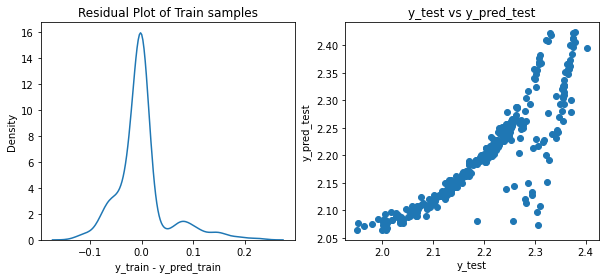

In [102]:
from sklearn.linear_model import Lasso

ls = Lasso()
alpha = np.logspace(-3,3, num= 14)

ls_rs = RandomizedSearchCV(estimator=ls, param_distributions=dict(alpha = alpha))

reg_model(ls_rs)

## Random Forest Regressor

Train R2-score : 0.84
Test R2-score : 0.82
Train Mean absolute error : 0.02
Test Mean absolute error : 0.02
Train Mean Squared error : 0.0
Test Mean Squared error : 0.0
Train CV scores : [0.8388172  0.89059121 0.76938871 0.79872304 0.81320326]
Train CV mean : 0.82


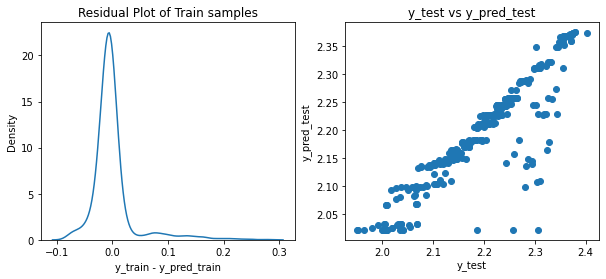

In [103]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
reg_model(rf_rs)

## Gradient Boosting Regressor

Train R2-score : 0.89
Test R2-score : 0.83
Train Mean absolute error : 0.02
Test Mean absolute error : 0.02
Train Mean Squared error : 0.0
Test Mean Squared error : 0.0
Train CV scores : [0.85690167 0.89018755 0.78396724 0.81588003 0.80301463]
Train CV mean : 0.83


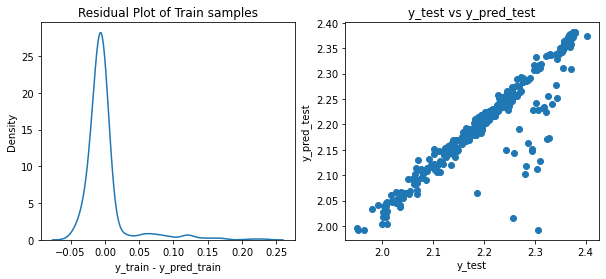

In [105]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
reg_model(gb_rs)

# Model Results

In [106]:
Algos = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Algos,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV,
                     "mae_train":mae_train,"mse_train":mse_test,"mae_test":mae_test,"mse_test":mse_test})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train),mae_train,mse_train,mae_test,mse_test
0,LinearRegression,0.75,0.77,0.75,0.03,0.0,0.03,0.0
1,Ridge,0.75,0.77,0.75,0.03,0.0,0.03,0.0
2,Lasso,0.75,0.77,0.71,0.03,0.0,0.03,0.0
3,RandomForestRegressor,0.84,0.82,0.82,0.02,0.0,0.02,0.0
4,GradientBoostingRegressor,0.89,0.83,0.83,0.02,0.0,0.02,0.0


## Gradient Boosting Regressor has lowest bias and variance among other all models